Importing the required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In the above cell we are importing warnings because while importing seaborn it will give a lot of warnings

1) Importing/Loading tha Data :

In [6]:
df = pd.read_csv("auto-mpg.csv")

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

The code in in the above cell is used to display the max rows and columns at once

Viewing the Data :

In [8]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
5,15.0,8,429.0,198,4341,10.0,70,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,amc ambassador dpl


2) Checking the Data info :

a) How many observations & columns do the data have ?

shape of the Data :

In [10]:
print('Shape of the Train data :',df.shape)
print('No of Rows or observations :',df.shape[0])
print('No of columns :',df.shape[1])

Shape of the Train data : (398, 8)
No of Rows or observations : 398
No of columns : 8


b) Are there any missing values ?

Checking the Null Values :

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

As we can observe that there are no null values in the Data set.

c) What are the data types ?

Viewing the Data Types :

In [12]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
car name         object
dtype: object

d) Are there any unusual Data Type ?

In [13]:
# In order to find unusual data type first we will look at the head & data dictionary 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


As we can observe that the "horsepower" column is integer data type but in our python it is reading as object data type so it is an unusual data type

We can also use the function "info" to see the column data types and null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


3) Data preprocessing & Exploratory Data Analysis

a) Check the unique values in the column Car_name ?

In [16]:
df["car name"].nunique()

305

In [17]:
df["car name"].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

As we can observe that there are 305 unique values

Since the data type is obect data type which implies that it is a categorical variable with 305 levels , so we need to do label encoding but it will create 305 unique numeric numbers which inturn effects the interpretibilty of this column while using it in a model buiding.Also the column does not convey any useful information nothing but names.

b) Checking the values in the Horsepower column :

First we will try to convert the data type from object to int

In [23]:
df.horsepower.astype('int')

ValueError: invalid literal for int() with base 10: '?'

As we can observe that the horsepower column consists of '?' symbol that's why it is reading as object data type.

In [30]:
df[df.horsepower=='?'].horsepower.value_counts()

?    6
Name: horsepower, dtype: int64

There are 6 observations having this  " ? "  symbol.

In [33]:
# For Imputation we need to find the mean and median values of the horsepower .
l = df[df.horsepower !='?'].horsepower
l[:10]

0    130
1    165
2    150
3    150
4    140
5    198
6    220
7    215
8    225
9    190
Name: horsepower, dtype: object

In [34]:
l.shape

(392,)

In [37]:
l.dtype

dtype('O')

In [38]:
l=l.astype('int')
l.dtype

dtype('int32')

In [41]:
print("Mean value of the Horsepower :",l.mean())
print("Median value of the Horsepower :",l.median())

Mean value of the Horsepower : 104.46938775510205
Median value of the Horsepower : 93.5


As we can observe that the mean & median values are somewhat closer to each other , so let's impute the column with median value

In [43]:
df.horsepower=df.horsepower.replace('?',l.median())
df[df.horsepower =='?'].horsepower.value_counts()

Series([], Name: horsepower, dtype: int64)

In [45]:
# We will convert the data type from object to Float.
df.horsepower=df.horsepower.astype('float')
df.horsepower.dtype

dtype('float64')

c) Summary Statistics :

In [47]:
# For summary statistics we will consider all the columns except the 'car name' column.
df1=df.drop(['car name'],axis=1)
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


For each column we will observe the mean and median values :

Note that if the difference between the mean & median value is large there is a chance that outliers are present in that column and also it is based on the business problem requirement.

In [57]:
for i in df1.columns:
    print(i+":")
    print("The Mean value of",i,":",df1[i].mean())
    print("The Median value of",i,":",df1[i].median())
    print("The difference value between mean & median is  :",df1[i].mean()-df1[i].median())
    print("Range ",df[i].max()-df[i].min())
    print("Inter Quartile Range :",df[i].quantile(0.75)-df[i].quantile(0.25))
    print('-'*60)

mpg:
The Mean value of mpg : 23.514572864321615
The Median value of mpg : 23.0
The difference value between mean & median is  : 0.5145728643216145
Range  37.6
Inter Quartile Range : 11.5
------------------------------------------------------------
cylinders:
The Mean value of cylinders : 5.454773869346734
The Median value of cylinders : 4.0
The difference value between mean & median is  : 1.4547738693467336
Range  5
Inter Quartile Range : 4.0
------------------------------------------------------------
displacement:
The Mean value of displacement : 193.42587939698493
The Median value of displacement : 148.5
The difference value between mean & median is  : 44.925879396984925
Range  387.0
Inter Quartile Range : 157.75
------------------------------------------------------------
horsepower:
The Mean value of horsepower : 104.30402010050251
The Median value of horsepower : 93.5
The difference value between mean & median is  : 10.804020100502512
Range  184.0
Inter Quartile Range : 49.0
----

d) Box plots for each column & their distributions :

MPG column :

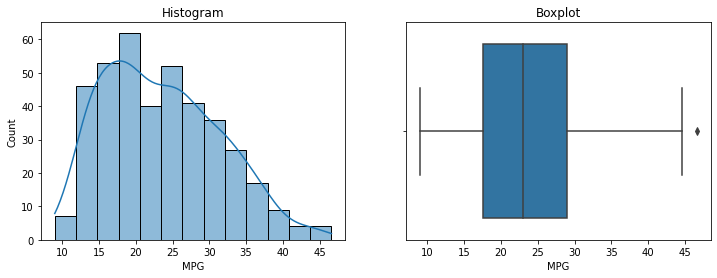

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.mpg,kde=True)
plt.title("Histogram")
plt.xlabel("MPG")

plt.subplot(1,2,2)
sns.boxplot(df.mpg)
plt.title("Boxplot")
plt.xlabel("MPG")

plt.show()

As we can observe that it is a continuous data and the maximum value is 50 although it is showing as an outlier but we won't consider it as an outlier

Cylinders column :

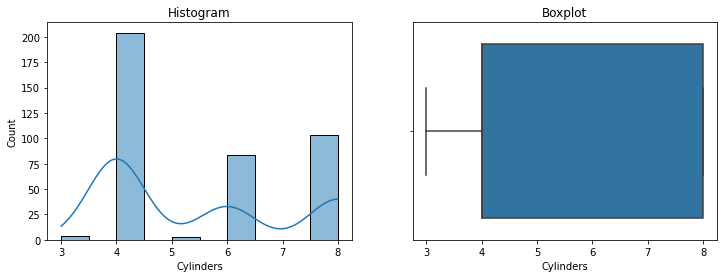

In [65]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.cylinders,kde=True)
plt.title("Histogram")
plt.xlabel("Cylinders")

plt.subplot(1,2,2)
sns.boxplot(df.cylinders)
plt.title("Boxplot")
plt.xlabel("Cylinders")

plt.show()

As we can observe that cylinders column is a discrete numeric column with 5 levels so we need to consider this column as a categorical column

In [66]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Displacement Column :

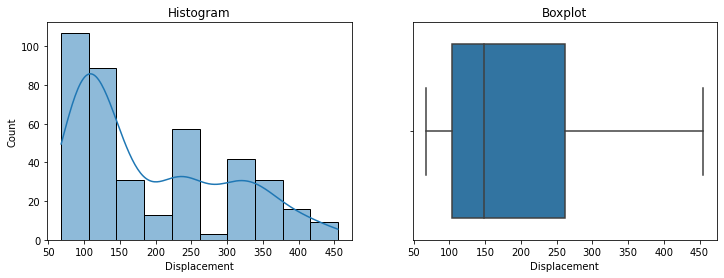

In [67]:
c

As we can see that it is a continuous numeric column with no outliers present in it

HorsePower column :

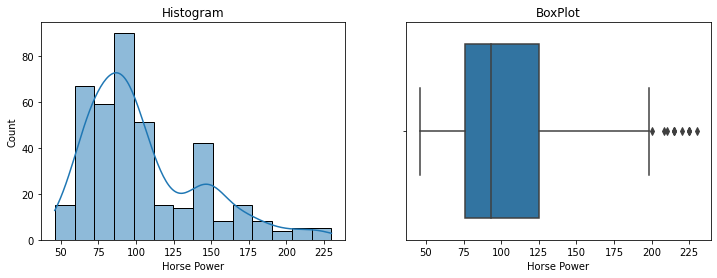

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.horsepower,kde=True)
plt.title("Histogram")
plt.xlabel("Horse Power")

plt.subplot(1,2,2)
sns.boxplot(df.horsepower)
plt.title("BoxPlot")
plt.xlabel("Horse Power")

plt.show()

As we can see that it is a continous numeric column and there are outliers present in it.

In [61]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name'],
      dtype='object')

Weight Column :

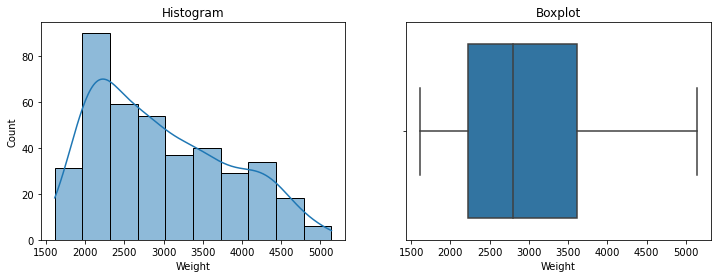

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.weight,kde=True)
plt.title("Histogram")
plt.xlabel("Weight")

plt.subplot(1,2,2)
sns.boxplot(df.weight)
plt.title("Boxplot")
plt.xlabel("Weight")

plt.show()

As we can see that it is a continuous numeric column and there are no outliers present in it.

Acceleration column :

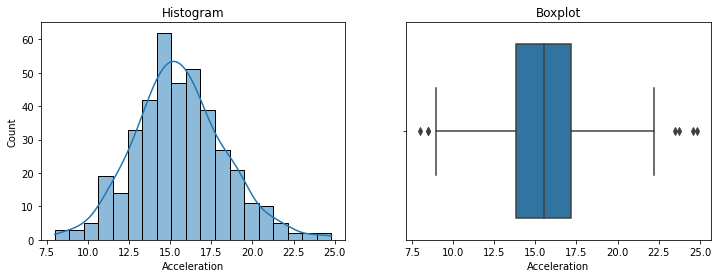

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df.acceleration,kde=True)
plt.title("Histogram")
plt.xlabel("Acceleration")

plt.subplot(1,2,2)
sns.boxplot(df.acceleration)
plt.title("Boxplot")
plt.xlabel("Acceleration")

plt.show()

As we can observe that the shape is somewhat closer to Normal Distribution and the box plot is showing that ouliers are present but we won't consider them as outliers

Model Year :

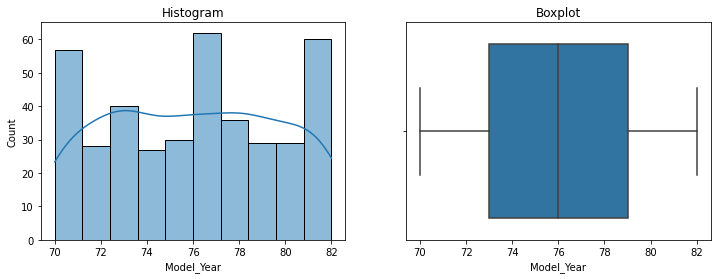

In [72]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['model year'],kde=True)
plt.title("Histogram")
plt.xlabel("Model_Year")

plt.subplot(1,2,2)
sns.boxplot(df['model year'])
plt.title("Boxplot")
plt.xlabel("Model_Year")

plt.show()

In [73]:
df['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64

As we can see that the Model Year comes under discrete numeric type with the values lie in [70,82]